---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [7]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [8]:
def answer_one():
    
    # Your code here
    df = pd.read_csv("fraud_data.csv")
    label = df["Class"]
    label_count = np.bincount(label)
    
    return  label_count[1]/(np.sum(label_count))# Return your answer

answer_one()


0.016410823768035772

In [9]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('readonly/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [10]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # Your code here
    dummy_clf = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)
    predicted_y = dummy_clf.predict(X_test)
    
    return (dummy_clf.score(X_test, y_test), recall_score(y_test, predicted_y)) # Return your answer
answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [11]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # Your code here
    svc = SVC().fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    
    accuracy_score = svc.score(X_test, y_test)
    recall_score = recall_score(y_test, y_pred)
    precision_score = precision_score(y_test, y_pred)
    return (accuracy_score, recall_score, precision_score) # Return your answer
answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [13]:
def label(x):
    if x < -220:
        return 0
    return 1

def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svc = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    pred = svc.decision_function(X_test)
    pred_y = [label(x) for x in pred]
    
    return confusion_matrix(y_test, pred_y) # Return your answer
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve

# Fit the model
lr = LogisticRegression().fit(X_train, y_train)
y_score = lr.predict_proba(X_test)[:, 1]

# Plot precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
fpr, tpr, threshold = roc_curve(y_test, y_score)

In [24]:
precision.shape

(3253,)

<IPython.core.display.Javascript object>


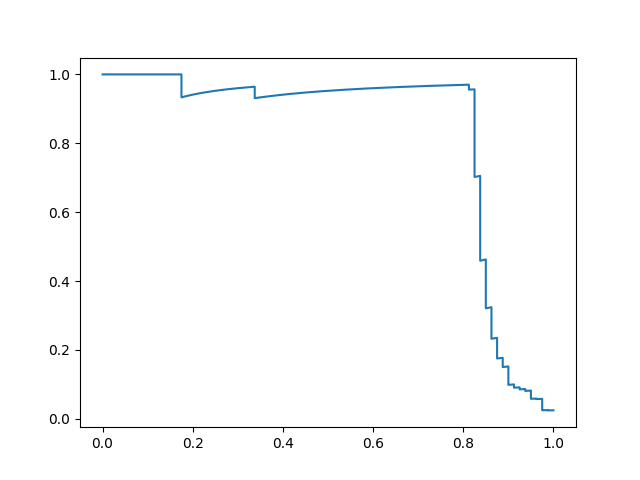

When precision is 0.75, the recall is 0.825


In [29]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure()
plt.plot(recall, precision)
precision_idx = np.where(precision == 0.75)[0][0]
print('When precision is 0.75, the recall is {}'.format(recall[precision_idx]))

<IPython.core.display.Javascript object>


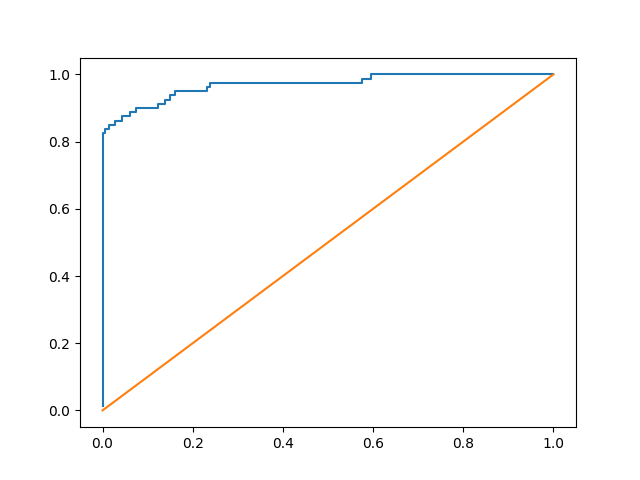

When fpr is 0.16, the tpr is 0.95


In [40]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
fpr_idx = np.where(abs(fpr-0.16) < 10**-2)[0][-1]

print('When fpr is 0.16, the tpr is {}'.format(tpr[fpr_idx]))

In [41]:
def answer_five():
        
    # Your code here
    
    return (recall[precision_idx],tpr[fpr_idx]) # Return your answer

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [47]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    params = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    lr = LogisticRegression()
    clf = GridSearchCV(lr, params, scoring = "recall", cv = 3).fit(X_train, y_train)
    result = clf.cv_results_
    
    return result['mean_test_score'].reshape(-1, 2) # Return your answer

answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

<IPython.core.display.Javascript object>


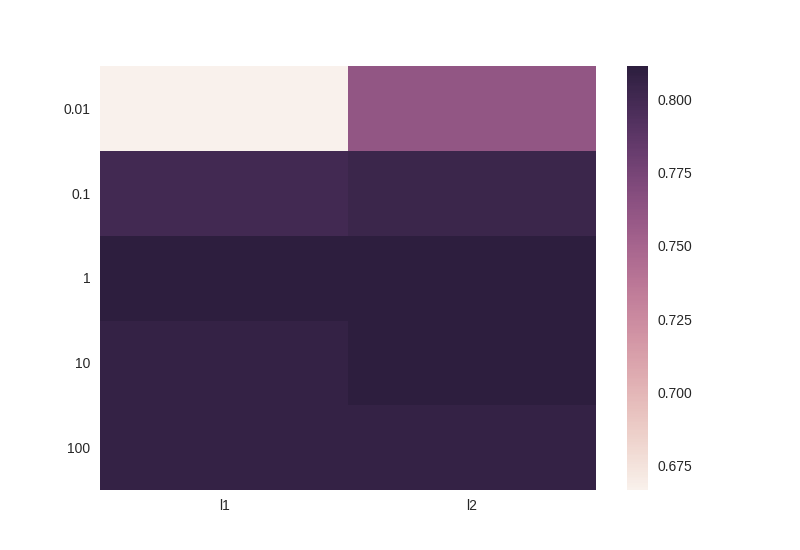

In [48]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())